In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


# Project: European Soccer Database

Table of Contents

Introduction

Data Gathering

Data Assessing

Data Cleaning

Exploratory Data Analysis

Conclusions

# Introduction

In this project I will analyze the soccer database from several European countries, from 2008 to 2016. The data has been downloaded via SQLite and merged inside the tool using JOINs.

Questions: Which are the top 3 leagues that had the most wins during 2008-2016?

Which teams in the 3 leagues won most of the games? Who is the most rated player? 

What are the attributes that contribute to the players' overall rating? What team attributes lead to the most victories?

# Data Gathering

In [2]:
df1 = pd.read_csv('Player.csv')

In [3]:
df1

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [4]:
df2 = pd.read_csv('Player_Attributes.csv')

In [5]:
df2

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [6]:
player = df1.merge(df2, on = 'player_api_id')

In [7]:
player

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,6,189615,2016-04-21 00:00:00,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,7,189615,2016-04-07 00:00:00,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,8,189615,2016-01-07 00:00:00,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,9,189615,2015-12-24 00:00:00,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,10,189615,2015-12-17 00:00:00,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [8]:
df3 = pd.read_csv('Team.csv')

In [9]:
df3

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [10]:
df4 = pd.read_csv('Team_Attributes.csv')

In [11]:
df4

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [12]:
Team = df3.merge(df4, on = 'team_api_id')

In [13]:
Team

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
5,1,9987,673.0,KRC Genk,GEN,490,673,2015-09-10 00:00:00,58,Balanced,...,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover
6,2,9993,675.0,Beerschot AC,BAC,149,675,2010-02-22 00:00:00,35,Balanced,...,50,Normal,Organised,70,High,70,Double,70,Wide,Cover
7,2,9993,675.0,Beerschot AC,BAC,150,675,2011-02-22 00:00:00,47,Balanced,...,67,Lots,Organised,33,Deep,34,Press,48,Normal,Offside Trap
8,2,9993,675.0,Beerschot AC,BAC,151,675,2012-02-22 00:00:00,55,Balanced,...,49,Normal,Organised,45,Medium,46,Press,50,Normal,Cover
9,2,9993,675.0,Beerschot AC,BAC,152,675,2013-09-20 00:00:00,47,Balanced,...,49,Normal,Organised,45,Medium,46,Press,67,Wide,Cover


In [14]:
Match = pd.read_csv('Match.csv')

In [15]:
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


# Data Assessing

In [16]:
player.tail()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,2009-08-30 00:00:00,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,2009-02-22 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,2008-08-30 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,2007-08-30 00:00:00,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183978,102359,2007-02-22 00:00:00,...,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


In [17]:
player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [18]:
player.shape

(183978, 48)

In [19]:
player.nunique()

id_x                     11060
player_api_id            11060
player_name              10848
player_fifa_api_id_x     11060
birthday                  5762
height                      20
weight                      50
id_y                    183978
player_fifa_api_id_y     11062
date                       197
overall_rating              61
potential                   56
preferred_foot               2
attacking_work_rate          8
defensive_work_rate         19
crossing                    95
finishing                   97
heading_accuracy            96
short_passing               95
volleys                     93
dribbling                   97
curve                       92
free_kick_accuracy          97
long_passing                95
ball_control                93
acceleration                86
sprint_speed                85
agility                     81
reactions                   78
balance                     81
shot_power                  96
jumping                     79
stamina 

In [20]:
player.isnull().sum()

id_x                       0
player_api_id              0
player_name                0
player_fifa_api_id_x       0
birthday                   0
height                     0
weight                     0
id_y                       0
player_fifa_api_id_y       0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength                 836
long_shots    

In [21]:
player.info

<bound method DataFrame.info of          id_x  player_api_id          player_name  player_fifa_api_id_x  \
0           1         505942   Aaron Appindangoye                218353   
1           1         505942   Aaron Appindangoye                218353   
2           1         505942   Aaron Appindangoye                218353   
3           1         505942   Aaron Appindangoye                218353   
4           1         505942   Aaron Appindangoye                218353   
5           2         155782      Aaron Cresswell                189615   
6           2         155782      Aaron Cresswell                189615   
7           2         155782      Aaron Cresswell                189615   
8           2         155782      Aaron Cresswell                189615   
9           2         155782      Aaron Cresswell                189615   
10          2         155782      Aaron Cresswell                189615   
11          2         155782      Aaron Cresswell                189

In [22]:
player.dropna(inplace = True)

In [23]:
player.info

<bound method DataFrame.info of          id_x  player_api_id         player_name  player_fifa_api_id_x  \
0           1         505942  Aaron Appindangoye                218353   
1           1         505942  Aaron Appindangoye                218353   
2           1         505942  Aaron Appindangoye                218353   
3           1         505942  Aaron Appindangoye                218353   
4           1         505942  Aaron Appindangoye                218353   
5           2         155782     Aaron Cresswell                189615   
6           2         155782     Aaron Cresswell                189615   
7           2         155782     Aaron Cresswell                189615   
8           2         155782     Aaron Cresswell                189615   
9           2         155782     Aaron Cresswell                189615   
10          2         155782     Aaron Cresswell                189615   
11          2         155782     Aaron Cresswell                189615   
12    

In [24]:
player.isnull().sum()

id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
height                  0
weight                  0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision      

In [25]:
player.describe()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,5520.609207,137653.145514,166805.312530,181.877895,168.774593,91995.886274,166822.125803,68.635317,73.479457,55.142071,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,3190.378836,137599.735284,52825.971635,6.398588,15.098388,53092.657914,52821.443279,7.027950,6.581963,17.247231,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.000000,2.000000,33.000000,39.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2758.000000,35451.000000,156593.000000,177.800000,159.000000,46074.250000,156616.000000,64.000000,69.000000,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,5533.000000,80291.000000,183774.000000,182.880000,168.000000,92003.500000,183792.000000,69.000000,74.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,8253.000000,192841.000000,200130.000000,185.420000,179.000000,137935.750000,200138.000000,73.000000,78.000000,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.000000,234141.000000,94.000000,97.000000,95.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [26]:
player.duplicated().any()

False

In [27]:
player.duplicated().sum()

0

In [28]:
#columns that have missing values
player.columns[player.isnull().any()]

Index([], dtype='object')

In [29]:
Team.tail()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1453,50201,9777,324.0,Servette FC,SER,1156,324,2013-09-20 00:00:00,48,Balanced,...,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover
1454,50204,7730,1862.0,FC Lausanne-Sports,LAU,672,1862,2010-02-22 00:00:00,30,Slow,...,60,Normal,Organised,55,Medium,60,Press,50,Normal,Cover
1455,50204,7730,1862.0,FC Lausanne-Sports,LAU,673,1862,2012-02-22 00:00:00,37,Balanced,...,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover
1456,50204,7730,1862.0,FC Lausanne-Sports,LAU,674,1862,2013-09-20 00:00:00,51,Balanced,...,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover
1457,50204,7730,1862.0,FC Lausanne-Sports,LAU,675,1862,2014-09-19 00:00:00,37,Balanced,...,52,Normal,Organised,46,Medium,44,Press,55,Normal,Cover


In [30]:
Team.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [31]:
Team.shape

(1458, 29)

In [32]:
Team.nunique()

id_x                               288
team_api_id                        288
team_fifa_api_id_x                 285
team_long_name                     285
team_short_name                    251
id_y                              1458
team_fifa_api_id_y                 285
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass   

In [33]:
Team.isnull().sum()

id_x                                0
team_api_id                         0
team_fifa_api_id_x                  0
team_long_name                      0
team_short_name                     0
id_y                                0
team_fifa_api_id_y                  0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamW

In [34]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 29 columns):
id_x                              1458 non-null int64
team_api_id                       1458 non-null int64
team_fifa_api_id_x                1458 non-null float64
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id_y                              1458 non-null int64
team_fifa_api_id_y                1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassi

In [35]:
Team.dropna(inplace = True)

In [36]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 4 to 1457
Data columns (total 29 columns):
id_x                              489 non-null int64
team_api_id                       489 non-null int64
team_fifa_api_id_x                489 non-null float64
team_long_name                    489 non-null object
team_short_name                   489 non-null object
id_y                              489 non-null int64
team_fifa_api_id_y                489 non-null int64
date                              489 non-null object
buildUpPlaySpeed                  489 non-null int64
buildUpPlaySpeedClass             489 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         489 non-null object
buildUpPlayPassing                489 non-null int64
buildUpPlayPassingClass           489 non-null object
buildUpPlayPositioningClass       489 non-null object
chanceCreationPassing             489 non-null int64
chanceCreationPassingClass        4

In [37]:
Team.describe()

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,22771.777096,11301.245399,19274.509202,722.826176,19274.509202,54.100204,48.607362,49.372188,52.584867,53.094070,51.331288,45.233129,48.490798,51.611452
std,15054.945518,20902.931896,40697.893854,419.343252,40697.893854,9.791901,9.678290,10.271146,9.895637,9.938507,10.195058,8.877978,7.926689,7.573164
min,1.000000,1601.000000,1.000000,2.000000,1.000000,26.000000,24.000000,20.000000,21.000000,23.000000,22.000000,23.000000,24.000000,29.000000
25%,9548.000000,8426.000000,144.000000,363.000000,144.000000,48.000000,42.000000,41.000000,47.000000,48.000000,46.000000,39.000000,44.000000,48.000000
50%,20525.000000,8667.000000,571.000000,725.000000,571.000000,54.000000,49.000000,50.000000,53.000000,53.000000,52.000000,45.000000,48.000000,52.000000
75%,35294.000000,9904.000000,1904.000000,1081.000000,1904.000000,62.000000,55.000000,55.000000,59.000000,60.000000,57.000000,51.000000,54.000000,56.000000
max,50204.000000,274581.000000,112513.000000,1458.000000,112513.000000,80.000000,77.000000,79.000000,77.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [38]:
Team.duplicated().any()

False

In [39]:
Team.duplicated().sum()

0

In [40]:
Team.isnull().sum()

id_x                              0
team_api_id                       0
team_fifa_api_id_x                0
team_long_name                    0
team_short_name                   0
id_y                              0
team_fifa_api_id_y                0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass       

In [41]:
Team.dtypes

id_x                                int64
team_api_id                         int64
team_fifa_api_id_x                float64
team_long_name                     object
team_short_name                    object
id_y                                int64
team_fifa_api_id_y                  int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass              

In [42]:
#columns that have missing values
Team.columns[Team.isnull().any()]

Index([], dtype='object')

In [43]:
Match.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [45]:
Match.shape

(25979, 115)

In [46]:
Match.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
home_player_X1          3
home_player_X2          9
home_player_X3          8
home_player_X4          7
home_player_X5          9
home_player_X6          9
home_player_X7          9
home_player_X8          9
home_player_X9          9
home_player_X10         9
home_player_X11         6
away_player_X1          3
away_player_X2          8
away_player_X3          8
away_player_X4          8
away_player_X5          9
away_player_X6          9
away_player_X7          9
away_player_X8          9
                    ...  
B365H                 121
B365D                  72
B365A                 115
BWH                   237
BWD                   133
BWA                   261
IWH                   147
IWD         

In [47]:
Match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [48]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [49]:
Match.dropna(inplace = True)

In [50]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 3248 to 23416
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 1.6+ MB


In [51]:
Match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_X1      0
home_player_X2      0
home_player_X3      0
home_player_X4      0
home_player_X5      0
home_player_X6      0
home_player_X7      0
home_player_X8      0
home_player_X9      0
home_player_X10     0
home_player_X11     0
away_player_X1      0
away_player_X2      0
away_player_X3      0
away_player_X4      0
away_player_X5      0
away_player_X6      0
away_player_X7      0
away_player_X8      0
                   ..
B365H               0
B365D               0
B365A               0
BWH                 0
BWD                 0
BWA                 0
IWH                 0
IWD                 0
IWA                 0
LBH                 0
LBD                 0
LBA                 0
PSH                 0
PSD                 0
PSA       

In [52]:
Match.drop_duplicates(inplace = True)

In [53]:
Match.duplicated().any()

False

In [54]:
Match.duplicated().sum()

0

In [55]:
#columns that have missing values
Match.columns[Match.isnull().any()]

Index([], dtype='object')

# Data Cleaning

In [56]:
#Drop extraneous columns that are not relevant to our questions
#columns to drop in Matches.csv: 'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 
#'date' as there is no clean data in them , only comments
Match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 'date'], axis=1, inplace=True)

In [57]:
Match

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3248,3249,1729,1729,2012/2013,1,1228229,9825,8472,0,0,...,9.50,1.44,4.75,8.50,1.35,4.60,9.00,1.40,4.33,8.50
3249,3250,1729,1729,2012/2013,1,1228230,8668,10260,1,0,...,1.91,4.30,3.70,1.87,4.60,3.50,1.83,4.00,3.40,1.91
3250,3251,1729,1729,2012/2013,1,1228231,9879,9850,5,0,...,4.50,1.83,3.75,4.75,1.80,3.50,4.40,1.83,3.50,4.33
3251,3252,1729,1729,2012/2013,1,1228232,8456,8466,3,2,...,19.00,1.20,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00
3252,3253,1729,1729,2012/2013,1,1228233,10261,8586,2,1,...,2.80,2.62,3.40,2.75,2.60,3.30,2.75,2.50,3.40,2.70
3253,3254,1729,1729,2012/2013,1,1228234,10172,10003,0,5,...,3.60,2.00,3.50,4.00,2.00,3.40,3.60,2.00,3.40,3.60
3254,3255,1729,1729,2012/2013,1,1228235,9798,10194,1,1,...,3.00,2.40,3.30,3.25,2.40,3.20,3.10,2.30,3.30,3.10
3255,3256,1729,1729,2012/2013,1,1228236,8659,8650,3,0,...,1.91,4.33,3.60,1.95,4.10,3.50,1.85,4.00,3.40,1.91
3256,3257,1729,1729,2012/2013,1,1228237,8654,10252,1,0,...,3.30,2.25,3.40,3.40,2.25,3.30,3.30,2.30,3.30,3.10
3257,3258,1729,1729,2012/2013,1,1228238,8528,8455,0,2,...,1.53,6.50,3.80,1.65,6.00,3.90,1.55,6.00,4.00,1.53


In [58]:
#columns to drop: 'preferred foot', 'date' and 'player_fifa_api_id'
player.drop(['preferred_foot', 'date'], axis = 1, inplace = True)

In [59]:
#columns to drop in Teams.csv: 'team short name', 'team long name','id', 'team_fifa_api_id', 'date'
#drop the names of the teams as the data is very innacurate, only 20 names provided out of 288
Team.drop(['team_short_name', 'team_long_name', 'date'], axis=1, inplace=True)

In [60]:
#rename columns Country and League in Matches.csv and convert them to lowercase
Match = Match.rename(columns = {'Country':'country', 'League':'league'})

#confirm changes
Match.head(1)

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3248,3249,1729,1729,2012/2013,1,1228229,9825,8472,0,0,...,9.5,1.44,4.75,8.5,1.35,4.6,9.0,1.4,4.33,8.5


In [61]:
#drop rows with null values in Players
player.dropna(axis=0, how='any', inplace=True)
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 46 columns):
id_x                    180354 non-null int64
player_api_id           180354 non-null int64
player_name             180354 non-null object
player_fifa_api_id_x    180354 non-null int64
birthday                180354 non-null object
height                  180354 non-null float64
weight                  180354 non-null int64
id_y                    180354 non-null int64
player_fifa_api_id_y    180354 non-null int64
overall_rating          180354 non-null float64
potential               180354 non-null float64
attacking_work_rate     180354 non-null object
defensive_work_rate     180354 non-null object
crossing                180354 non-null float64
finishing               180354 non-null float64
heading_accuracy        180354 non-null float64
short_passing           180354 non-null float64
volleys                 180354 non-null float64
dribbling               180354 non-null f

In [62]:
#create a column in Matches to see which is the winner of the match
conditions = [(Match['home_team_goal'] > Match['away_team_goal']), (Match['home_team_goal'] < Match['away_team_goal'])]
choices = [Match['home_team_api_id'], Match['away_team_api_id']]
Match['winner'] = np.select(conditions, choices, default='draw')
Match.head()

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,winner
3248,3249,1729,1729,2012/2013,1,1228229,9825,8472,0,0,...,1.44,4.75,8.50,1.35,4.60,9.00,1.40,4.33,8.50,draw
3249,3250,1729,1729,2012/2013,1,1228230,8668,10260,1,0,...,4.30,3.70,1.87,4.60,3.50,1.83,4.00,3.40,1.91,8668
3250,3251,1729,1729,2012/2013,1,1228231,9879,9850,5,0,...,1.83,3.75,4.75,1.80,3.50,4.40,1.83,3.50,4.33,9879
3251,3252,1729,1729,2012/2013,1,1228232,8456,8466,3,2,...,1.20,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00,8456
3252,3253,1729,1729,2012/2013,1,1228233,10261,8586,2,1,...,2.62,3.40,2.75,2.60,3.30,2.75,2.50,3.40,2.70,10261


In [63]:
#drop the rows that contain 'draw' as they are not relevant for our analysis
Match = Match[Match.winner != 'draw']

In [64]:
#convert winner col to an int
Match['winner'] = Match['winner'].astype(int)

In [65]:
#confirm changes
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 3249 to 23416
Columns: 107 entries, id to winner
dtypes: float64(96), int32(1), int64(9), object(1)
memory usage: 1.1+ MB


In [66]:
Match['league_id'].value_counts()

21518    284
10257    271
1729     270
4769     252
7809     227
Name: league_id, dtype: int64

Text(0,0.5,'Wins')

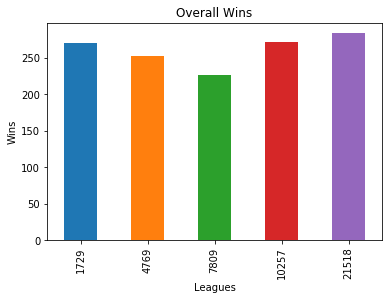

In [67]:
#plot the overall wins
Match.groupby('league_id')['winner'].count().plot(kind='bar', title='Overall Wins');
plt.xlabel('Leagues')
plt.ylabel('Wins')

Text(0.5,1,'Overall Wins')

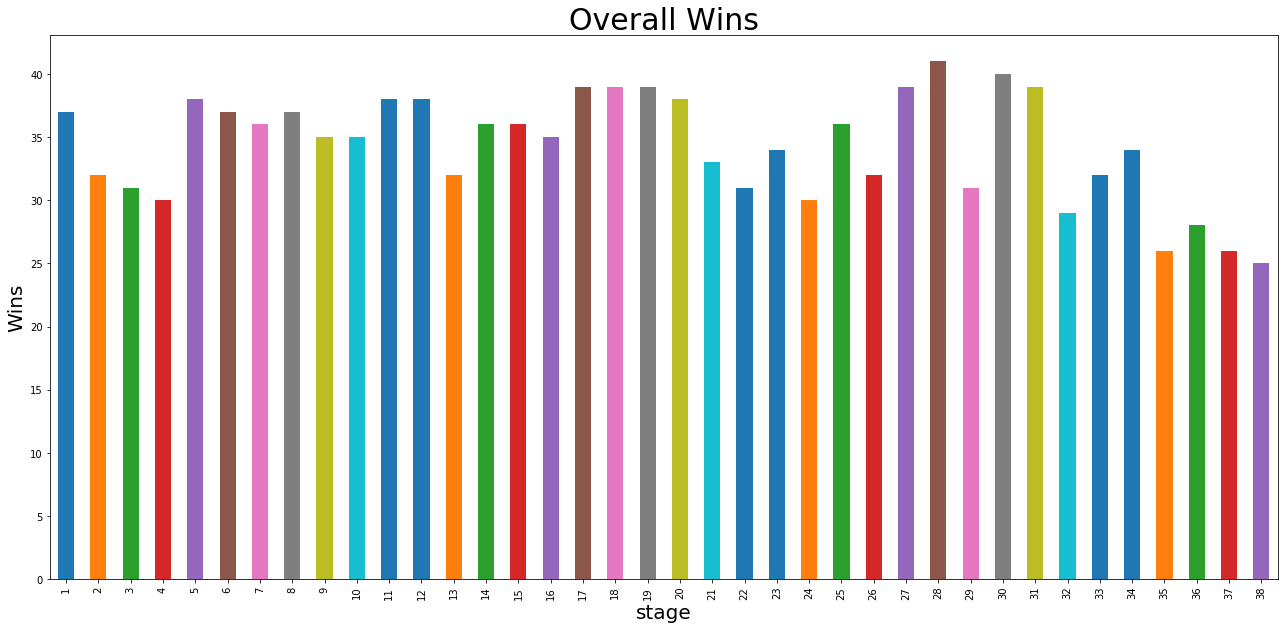

In [68]:
#plot the overall wins
Match.groupby('stage')['winner'].count().plot(kind='bar', figsize=(22,10));
plt.xlabel('stage', fontsize=20)
plt.ylabel('Wins', fontsize=20)
plt.title('Overall Wins', fontsize=30)

Who is the most rated player?

In [69]:
player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [70]:
#average rating
player['overall_rating'].mean()

68.63531720948801

In [71]:
#count players above average rating
above = player.query('overall_rating > overall_rating.mean()')
above['overall_rating'].count()

92427

In [72]:
#count players below average rating
below = player.query('overall_rating < overall_rating.mean()')
below['overall_rating'].count()

87927

In [73]:
#the most rated player
above.max()

id_x                                      11075
player_api_id                            722766
player_name             dos Santos Fabio Junior
player_fifa_api_id_x                     232693
birthday                    1999-02-25 00:00:00
height                                    203.2
weight                                      243
id_y                                     183978
player_fifa_api_id_y                     232693
overall_rating                               94
potential                                    97
attacking_work_rate                           y
defensive_work_rate                       tocky
crossing                                     95
finishing                                    97
heading_accuracy                             98
short_passing                                97
volleys                                      93
dribbling                                    97
curve                                        94
free_kick_accuracy                      

The most rated player is dos Santos Fabio Junior with a 94 overall rating.

What are the attributes that contribute to the players' overall rating?

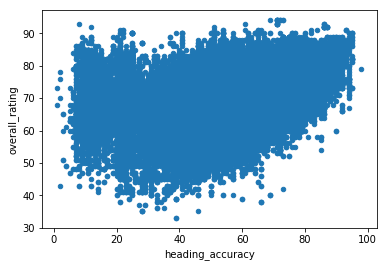

In [74]:
#relationship between rating and heading accuracy
player.plot(x='heading_accuracy', y='overall_rating', kind='scatter');

There is a positive correlation between heading accuracy and overall rating.

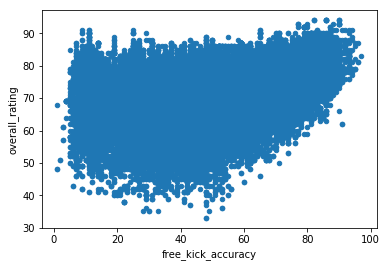

In [75]:
#relationship between rating and free kick accuracy
player.plot(x='free_kick_accuracy', y='overall_rating', kind='scatter');

Free kick accuracy doesn't have a strong impact in overall rating.

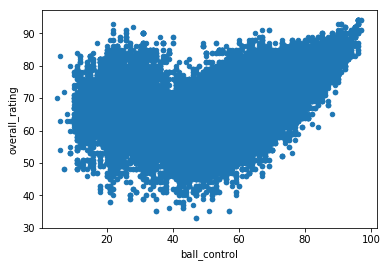

In [76]:
#relationship between rating and ball control
player.plot(x='ball_control', y='overall_rating', kind='scatter');


There is a strong positive correlation between overall rating and ball control.

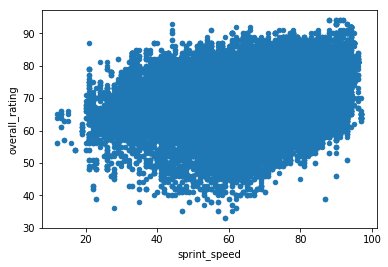

In [77]:
#relationship between rating and sprint speed
player.plot(x='sprint_speed', y='overall_rating', kind='scatter');

Strong positive correlation between overall rating and sprint speed.

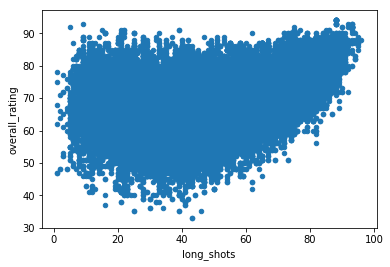

In [78]:
#relationship between rating and long shots
player.plot(x='long_shots', y='overall_rating', kind='scatter');

Positive correlation between long shots and overall rating.

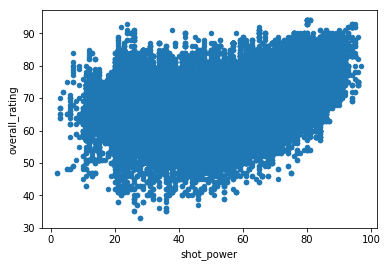

In [79]:
#relationship between rating and shot power
player.plot(x='shot_power', y='overall_rating', kind='scatter');


Strong correlation between shot power and overall rating.

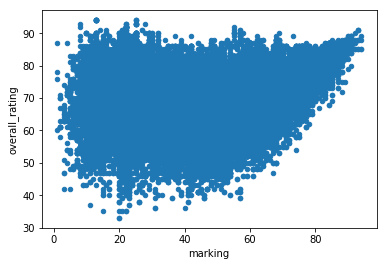

In [80]:
#relationship between rating and marking
player.plot(x='marking', y='overall_rating', kind='scatter');

We can't say there is a positive correlation between marking and overall rating.

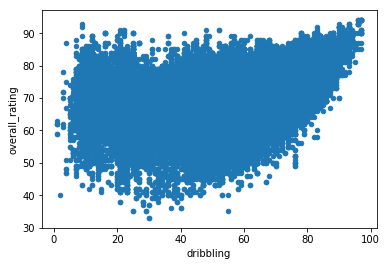

In [81]:
#relationship between rating and dribbling
player.plot(x='dribbling', y='overall_rating', kind='scatter');

Strong positive correlation between overall rating and dribbling.

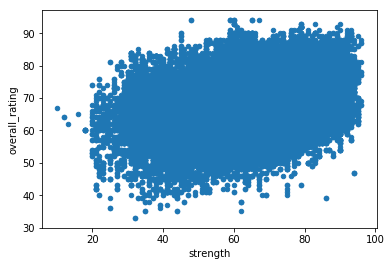

In [82]:
#relationship between rating and strength
player.plot(x='strength', y='overall_rating', kind='scatter');

Strong positive correlation between strength and overall rating

The attributes that count towards overall rating of the players are: heading accuracy, ball control, sprint speed, long shots, shot power, dribbling and strength.

Pie chart representation of 'attacking_work_rate' and 'defensive_work_rate'

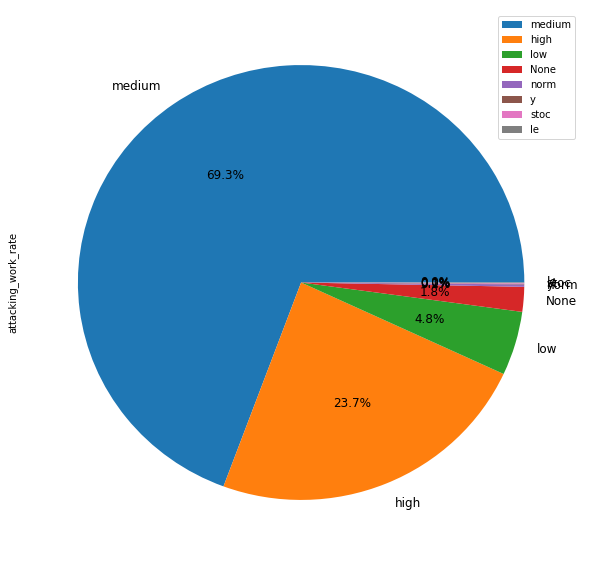

In [85]:
pieChart = player["attacking_work_rate"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

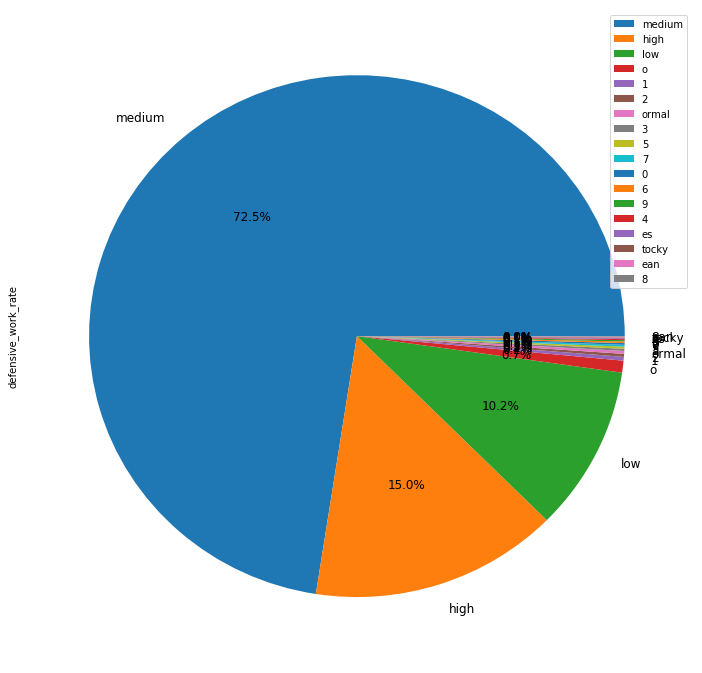

In [87]:
pieChart = player["defensive_work_rate"].value_counts().plot.pie(figsize=(12,12), autopct='%1.1f%%', fontsize = 12);
plt.legend();

Pie chart representation of team attribute.

In [89]:
Team.head(5)

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
4,1,9987,673.0,489,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
5,1,9987,673.0,490,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover
14,3,10000,15005.0,1457,15005,54,Balanced,42.0,Normal,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
15,3,10000,15005.0,1458,15005,54,Balanced,42.0,Normal,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
20,4,9994,2007.0,763,2007,62,Balanced,45.0,Normal,52,...,62,Normal,Organised,45,Medium,52,Press,52,Normal,Cover


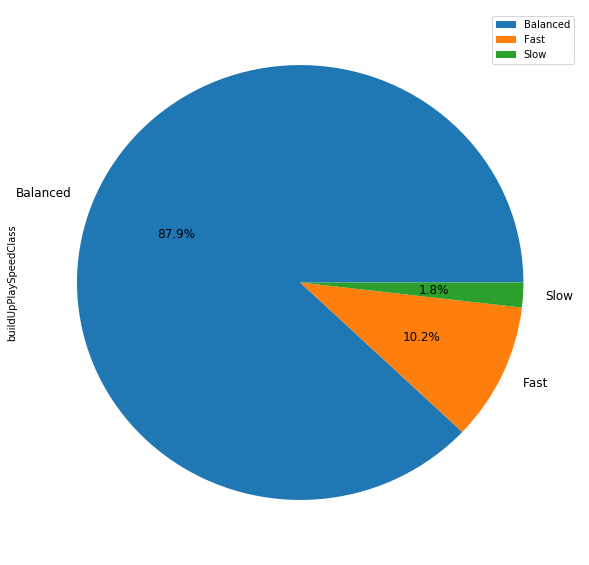

In [90]:
pieChart = Team["buildUpPlaySpeedClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

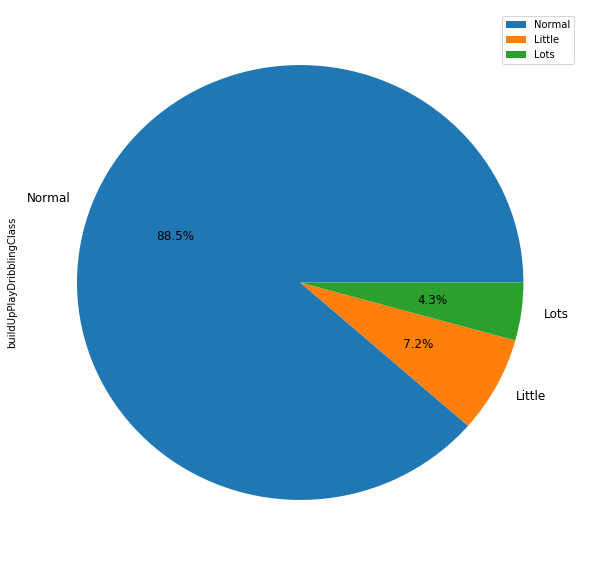

In [91]:
pieChart = Team["buildUpPlayDribblingClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

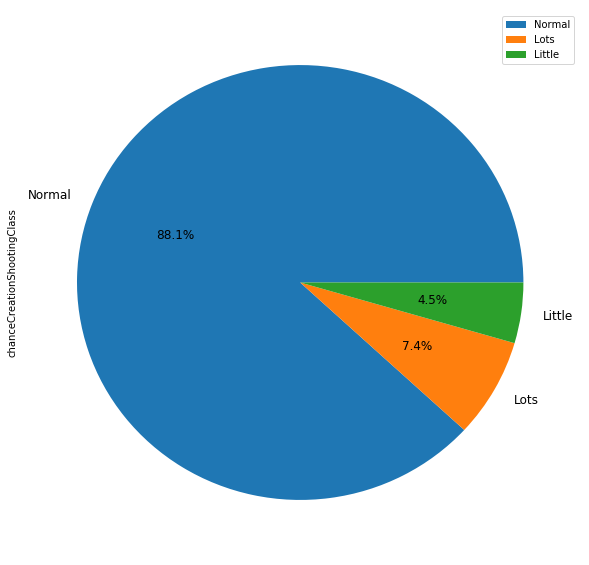

In [92]:
pieChart = Team["chanceCreationShootingClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

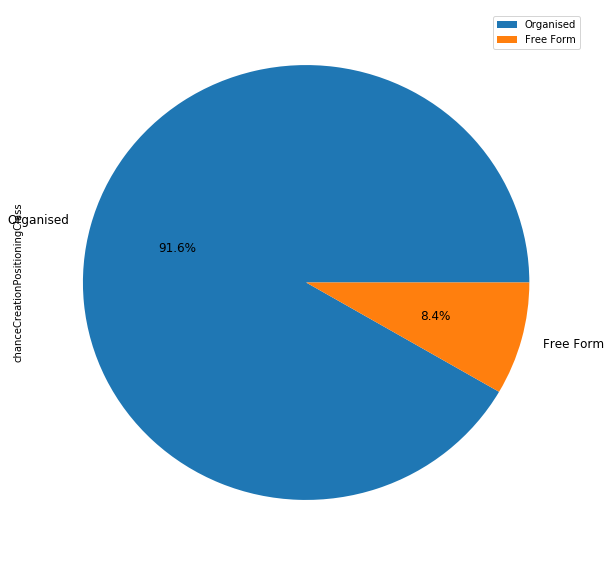

In [93]:
pieChart = Team["chanceCreationPositioningClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

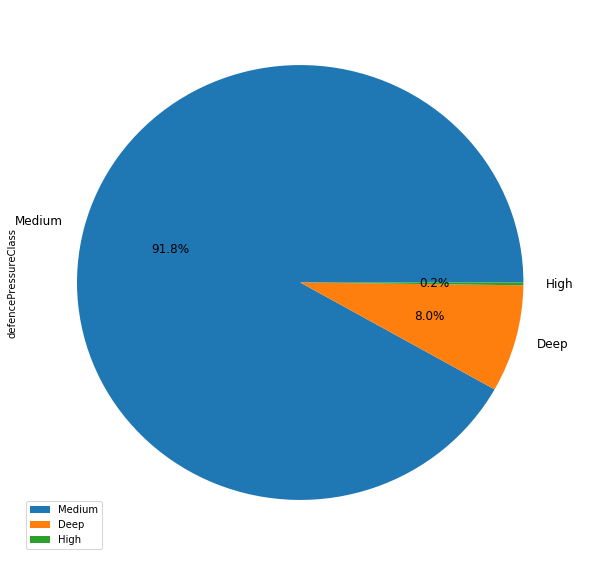

In [94]:
pieChart = Team["defencePressureClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

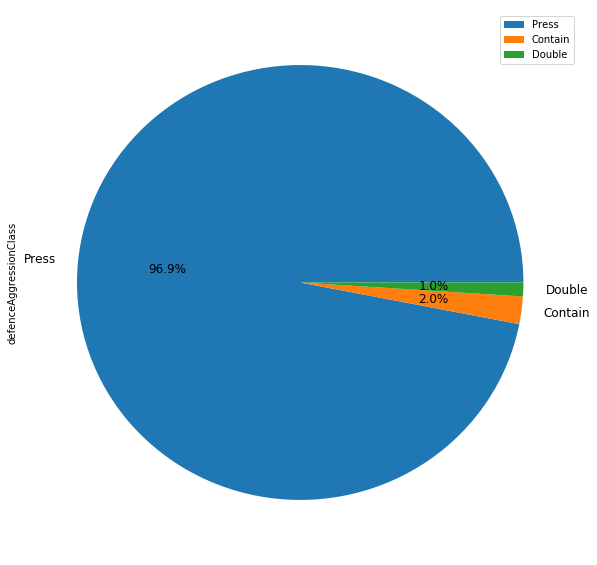

In [95]:
pieChart = Team["defenceAggressionClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

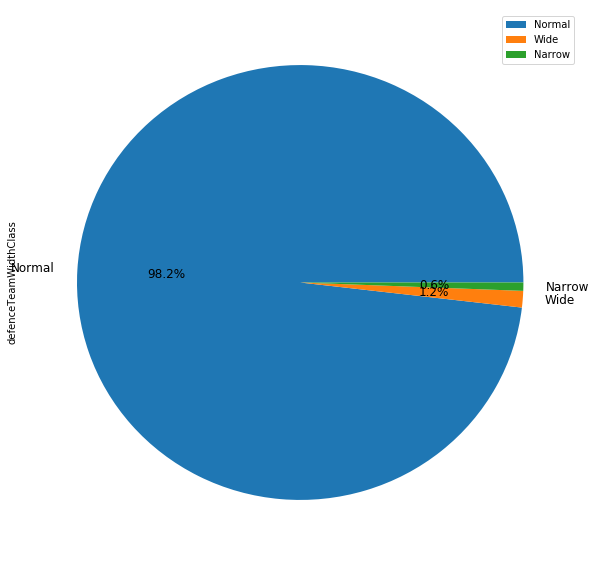

In [96]:
pieChart = Team["defenceTeamWidthClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

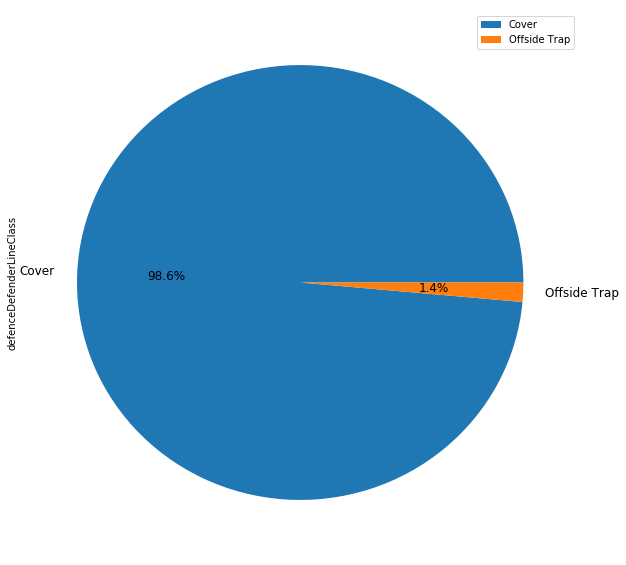

In [97]:
pieChart = Team["defenceDefenderLineClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

What team attributes lead to the most victories?

In [98]:
Team.head(1)

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
4,1,9987,673.0,489,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [99]:
#check attributes of the best team in Spain
best_team_spain = Team.query('team_api_id == 8634')
best_team_spain

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1255,43042,8634,241.0,123,241,35,Balanced,35.0,Normal,32,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1256,43042,8634,241.0,124,241,36,Balanced,35.0,Normal,51,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover


In [100]:
#check attributes of the best team in England
best_team_england = Team.query('team_api_id == 10260')
best_team_england

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
101,3457,10260,11.0,811,11,46,Balanced,34.0,Normal,54,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
102,3457,10260,11.0,812,11,38,Balanced,42.0,Normal,44,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover


In [101]:
#check attributes of the best team in Italy
best_team_italy = Team.query('team_api_id == 9885')
best_team_italy

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
715,20522,9885,45.0,629,45,26,Slow,47.0,Normal,24,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
716,20522,9885,45.0,630,45,50,Balanced,35.0,Normal,20,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


In [102]:
#merge dataframes
best_teams = best_team_spain.append(best_team_england, ignore_index=True)
best_teams = best_teams.append(best_team_italy, ignore_index=True)
best_teams.head(6)

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,43042,8634,241.0,123,241,35,Balanced,35.0,Normal,32,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1,43042,8634,241.0,124,241,36,Balanced,35.0,Normal,51,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover
2,3457,10260,11.0,811,11,46,Balanced,34.0,Normal,54,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
3,3457,10260,11.0,812,11,38,Balanced,42.0,Normal,44,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
4,20522,9885,45.0,629,45,26,Slow,47.0,Normal,24,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
5,20522,9885,45.0,630,45,50,Balanced,35.0,Normal,20,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


I can say that the success of the best teams might be given by a balanced play speed and organised positioning.

# Limitations and Challenges

During the analysis of this project I faced many limitations and challenges due to the fact that the data was very inaccurate.

The name of the players were incomplete, some of them didn't have any last names, just first names, and also some of them were missing completely. Moreover, I couldn't link the players to the teamsas there was no correlation between them.

The team names were missing, so the analysis was based only on IDs and due to this I cannot show a clear image on which are the teams I relate to.

Relevant data is missing so

# Conclusions

I have found that the best leagues in Europe during 2008-2016 are Spain, England and Italy. The best teams have won around 200 games over this period.

The average rating of a player is 68 and there are more players above average than below average. The attributes that count towards this rating of the players are: heading accuracy, ball control, sprint speed, long shots, shot power, dribbling and strength.

The success of the best teams might be given by a balanced play speed and organised positioning.